In [1]:
from collections import defaultdict

from workflow.gunc.rank_contigs_by_contamination import GuncRankContigsByContamination
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF_RANKING = GuncRankContigsByContamination().output().read_cached()
DF_RANKING.head()

,gid,contig,length,gc,correct_genes,total_genes,pct_correct,gc_delta,order
0,GCA_000143435.1,CP002036.1,20426,38.690884,0,26,0.000000,5.793160,0
1,GCA_000143435.1,CP002035.1,44581,39.380005,0,50,0.000000,6.482280,1
2,GCA_000143435.1,CP002037.1,242962,31.996773,202,246,82.113821,0.900951,2
3,GCA_000143435.1,CP002034.1,1828169,32.897724,1626,1788,90.939597,0.000000,3
4,GCA_000153745.1,DS022288.2,65290,41.966611,0,61,0.000000,5.338278,0


In [3]:
D_GID_TO_TOTAL_SIZE = DF_RANKING[['gid', 'length']].groupby('gid').sum().to_dict()['length']

In [4]:
D_GID_TO_LENGTH_LT_50 = DF_RANKING[DF_RANKING['pct_correct'] < 50][['gid', 'length']].groupby('gid').sum().to_dict()['length']

In [5]:
D_GID_TO_LENGTH_GT_50 = DF_RANKING[DF_RANKING['pct_correct'] >= 50][['gid', 'length']].groupby('gid').sum().to_dict()['length']

In [6]:
def get_data():
    d_gid_to_data = defaultdict(lambda: {'x': list(), 'y': list()})
    d_gid_to_n_removed = defaultdict(lambda: 0)
    for _, row in tqdm(DF_RANKING.iterrows(), total=len(DF_RANKING)):
        gid = row['gid']
        length = row['length']

        d_gid_to_n_removed[gid] += int(length)
        d_gid_to_data[gid]['x'].append(100 * d_gid_to_n_removed[gid] / D_GID_TO_TOTAL_SIZE[gid])
        d_gid_to_data[gid]['y'].append(float(row['pct_correct']))


    return d_gid_to_data

D_DATA = get_data()

100%|██████████| 7372027/7372027 [06:12<00:00, 19812.10it/s]


In [35]:
def get_data3():

    out = defaultdict(lambda: list())

    for i in tqdm(range(1, 101)):
        d_gid_to_sum = DF_RANKING[DF_RANKING['pct_correct'] < i][['gid', 'length']].groupby('gid').sum().to_dict()['length']

        for gid, total_length in D_GID_TO_TOTAL_SIZE.items():
            pct = d_gid_to_sum.get(gid, 0) / total_length * 100
            out[i].append(pct)
    return out

D_MAP_PCT_TO_PCT_OF_GENOME = get_data3()

100%|██████████| 100/100 [01:08<00:00,  1.45it/s]


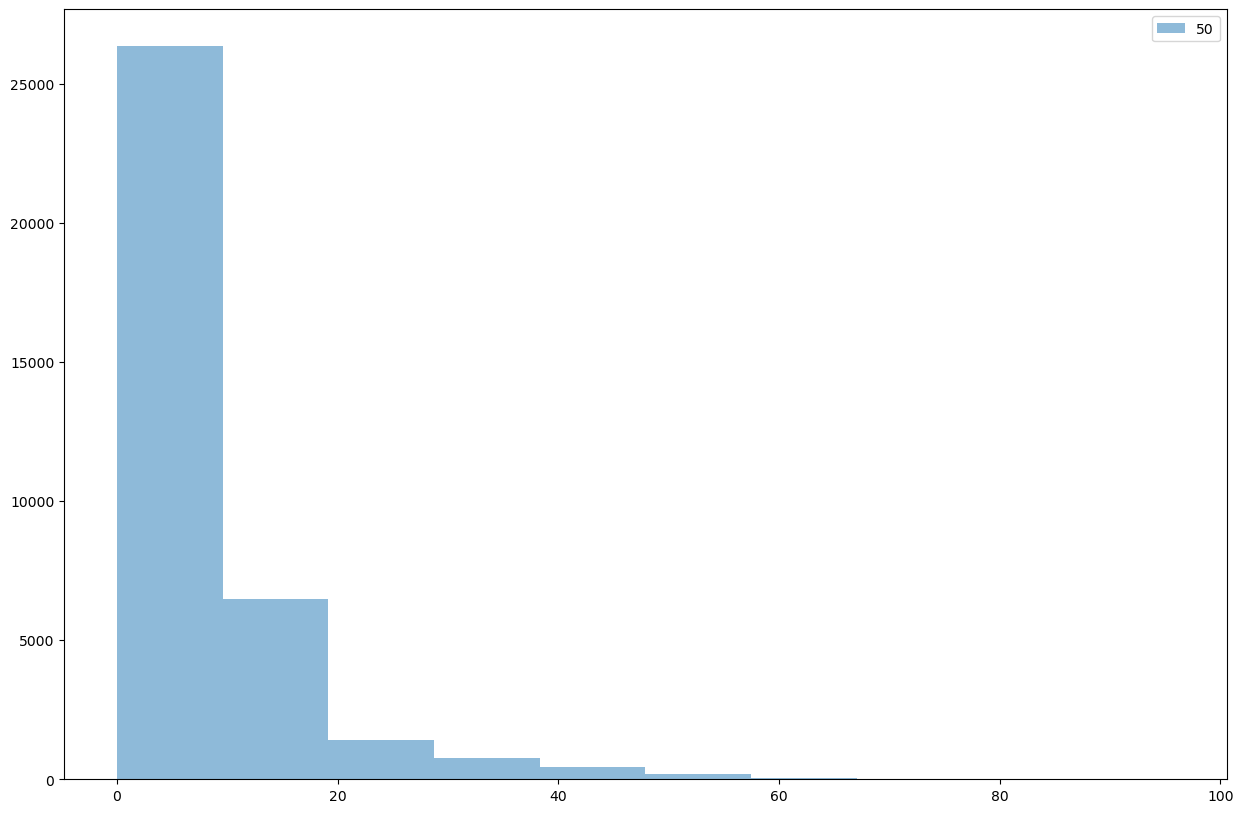

In [52]:
def plot_data3():

    fig, ax = plt.subplots(figsize=(15,10))
    for i, data in D_MAP_PCT_TO_PCT_OF_GENOME.items():
        if i != 50:
            continue
        ax.hist(data, label=str(i), alpha=0.5)

    plt.legend()
    plt.show()
    return
plot_data3()

In [16]:
def get_data_prop_contam():

    above_50 = list()
    below_50 = list()

    for gid, total_size in tqdm(D_GID_TO_TOTAL_SIZE.items()):
        len_under_50 = D_GID_TO_LENGTH_LT_50.get(gid, 0)
        len_above_50 = D_GID_TO_LENGTH_GT_50.get(gid, 0)

        pct_under_50 = 100 * len_under_50 / total_size
        pct_above_50 = 100 * len_above_50 / total_size

        above_50.append(pct_above_50)
        below_50.append(pct_under_50)

    return above_50, below_50

LST_ABOVE_50, LST_BELOW_50 = get_data_prop_contam()
print(LST_ABOVE_50[:5], LST_BELOW_50[:5])

100%|██████████| 35723/35723 [00:00<00:00, 732777.05it/s]

[96.9567977349778, 97.15735306859143, 74.41321552829055, 71.1807039498546, 94.37658610114147] [3.0432022650222037, 2.842646931408571, 25.586784471709443, 28.8192960501454, 5.623413898858529]


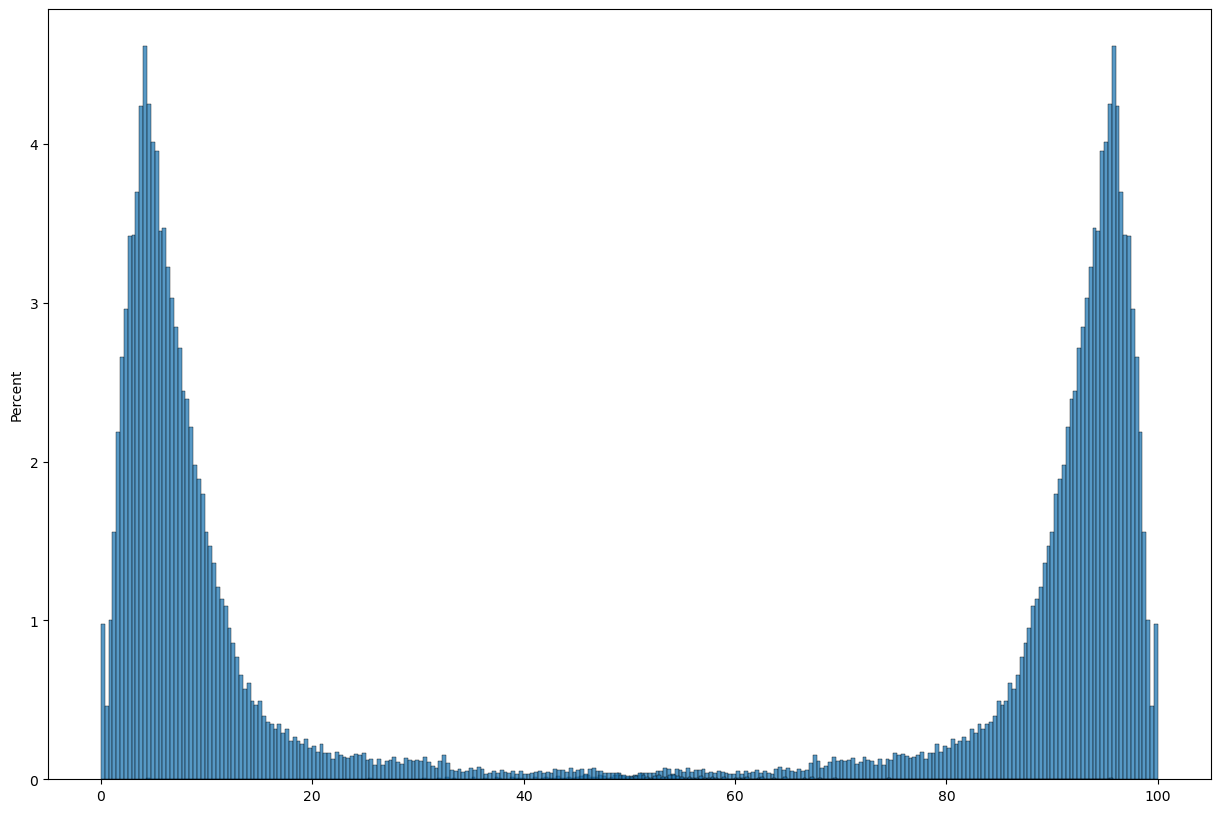

In [28]:
def plot_above_below():

    fig, ax = plt.subplots(figsize=(15, 10))
    sns.histplot(x=LST_ABOVE_50, cumulative=False, stat='percent', ax=ax)
    sns.histplot(x=LST_BELOW_50, cumulative=False, stat='percent', ax=ax)
    #
    # ax.dist(LST_ABOVE_50, label='above_50', bins=100, alpha=0.5)
    # ax.dist(LST_BELOW_50, label='below_50', bins=100, alpha=0.5)
    # plt.legend()
    # plt.show()

    return
plot_above_below()

In [53]:
def get_data_lt50():
    d_gid_to_data = defaultdict(lambda: {'x': list(), 'y': list()})
    d_gid_to_n_removed = defaultdict(lambda: 0)
    for _, row in tqdm(DF_RANKING.iterrows(), total=len(DF_RANKING)):
        gid = row['gid']
        length = row['length']

        if row['pct_correct'] > 50:
            continue

        d_gid_to_n_removed[gid] += int(length)
        d_gid_to_data[gid]['x'].append(100 * d_gid_to_n_removed[gid] / D_GID_TO_TOTAL_SIZE[gid])
        d_gid_to_data[gid]['y'].append(float(row['pct_correct']))


    return d_gid_to_data

D_DATA_LT50 = get_data_lt50()

 67%|██████▋   | 4944855/7372027 [04:05<02:00, 20144.95it/s]


KeyboardInterrupt: 

100%|██████████| 35723/35723 [00:18<00:00, 1982.47it/s]


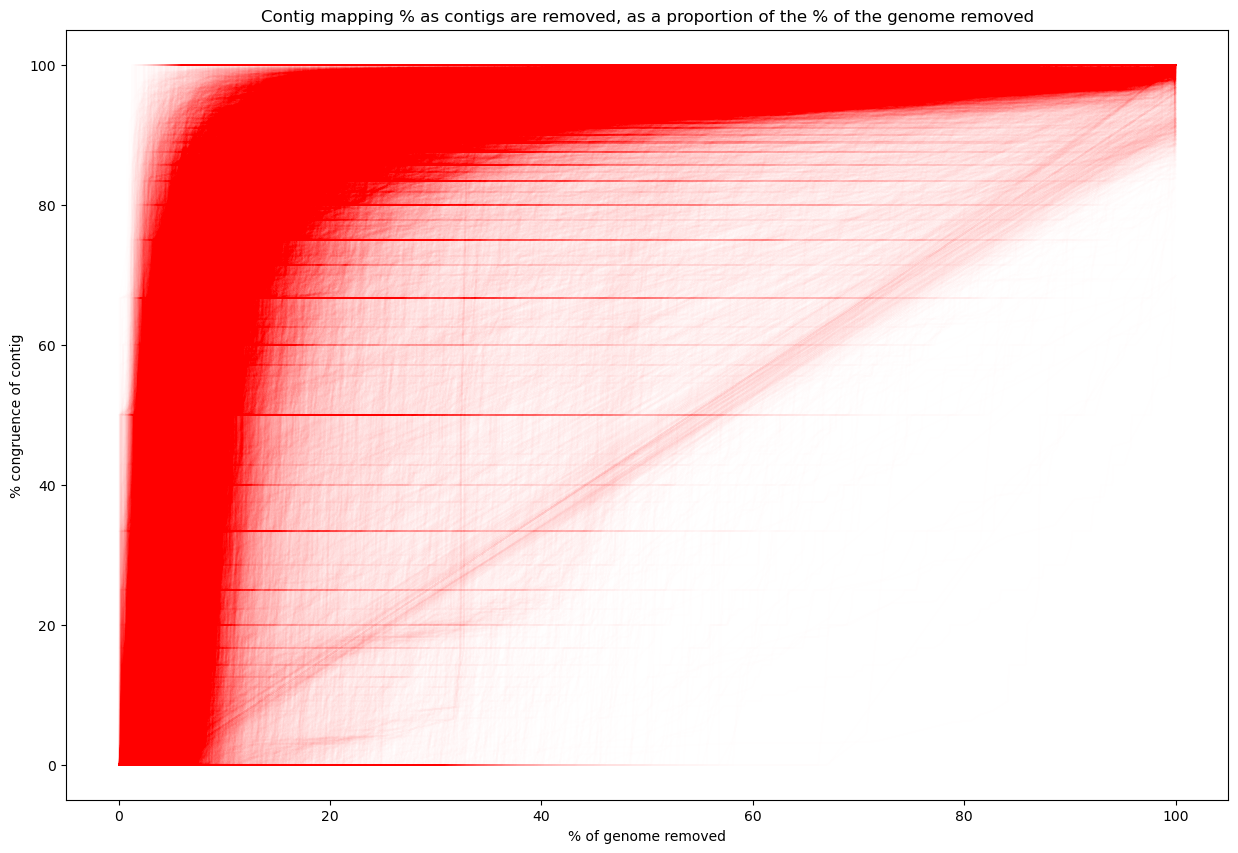

100%|██████████| 35723/35723 [00:17<00:00, 1990.00it/s]


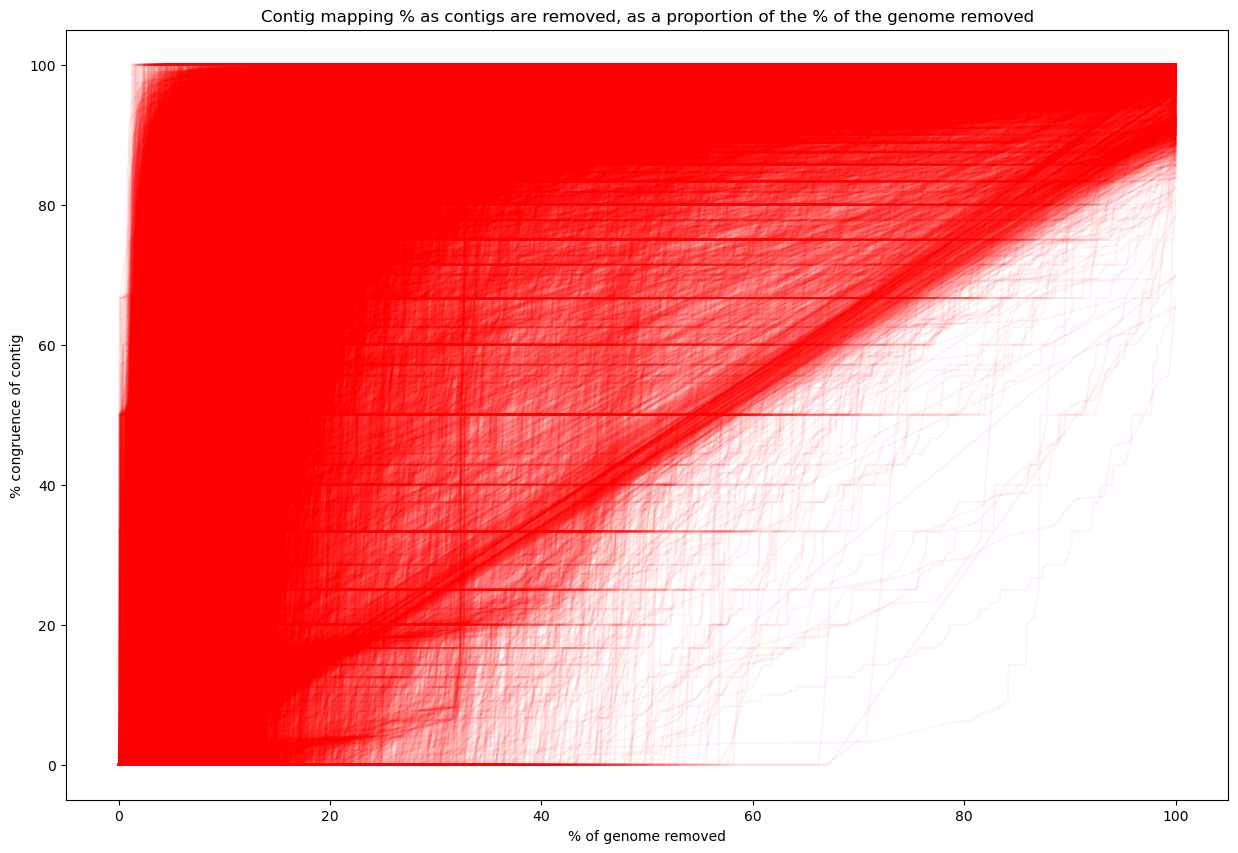

In [42]:
def make_plot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlabel('% of genome removed')
    ax.set_ylabel('% congruence of contig')
    for i, (gid, d_data) in tqdm(enumerate(D_DATA.items()), total=len(D_DATA)):
        ax.plot(d_data['x'], d_data['y'], alpha=0.05, c='r')
        # if i > 1000:
        #     break
    plt.title('Contig mapping % as contigs are removed, as a proportion of the % of the genome removed')
    plt.show()

make_plot()

# X axis = the percentage of the genome removed
# Y axis = the incongruence of the contig (i.e. % mapping back to true taxon)

100%|██████████| 35644/35644 [00:20<00:00, 1776.41it/s]


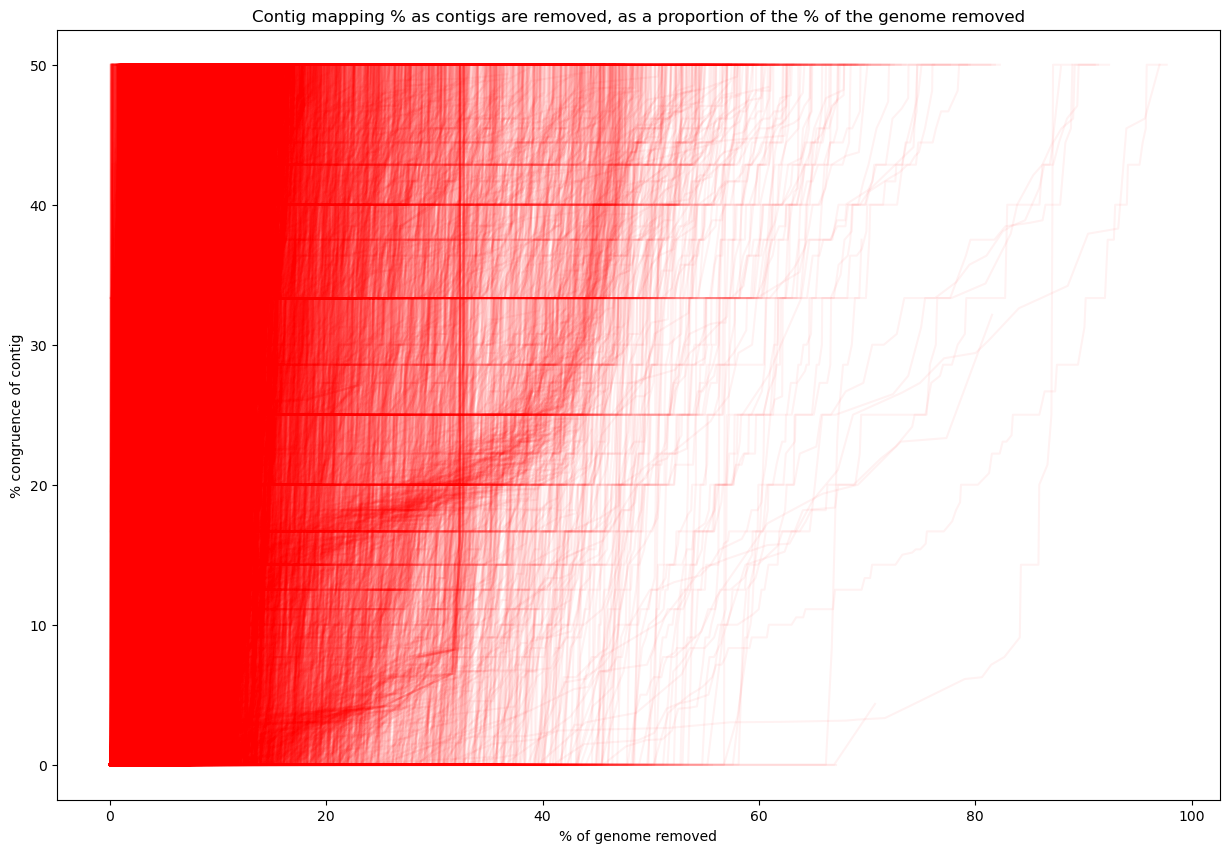

In [48]:
def make_plot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_xlabel('% of genome removed')
    ax.set_ylabel('% congruence of contig')
    for i, (gid, d_data) in tqdm(enumerate(D_DATA_LT50.items()), total=len(D_DATA_LT50)):
        ax.plot(d_data['x'], d_data['y'], alpha=0.05, c='r')
        # if i > 1000:
        #     break
    plt.title('Contig mapping % as contigs are removed, as a proportion of the % of the genome removed')
    plt.show()

make_plot()

# X axis = the percentage of the genome removed
# Y axis = the incongruence of the contig (i.e. % mapping back to true taxon)

100%|██████████| 35644/35644 [00:00<00:00, 306633.19it/s]


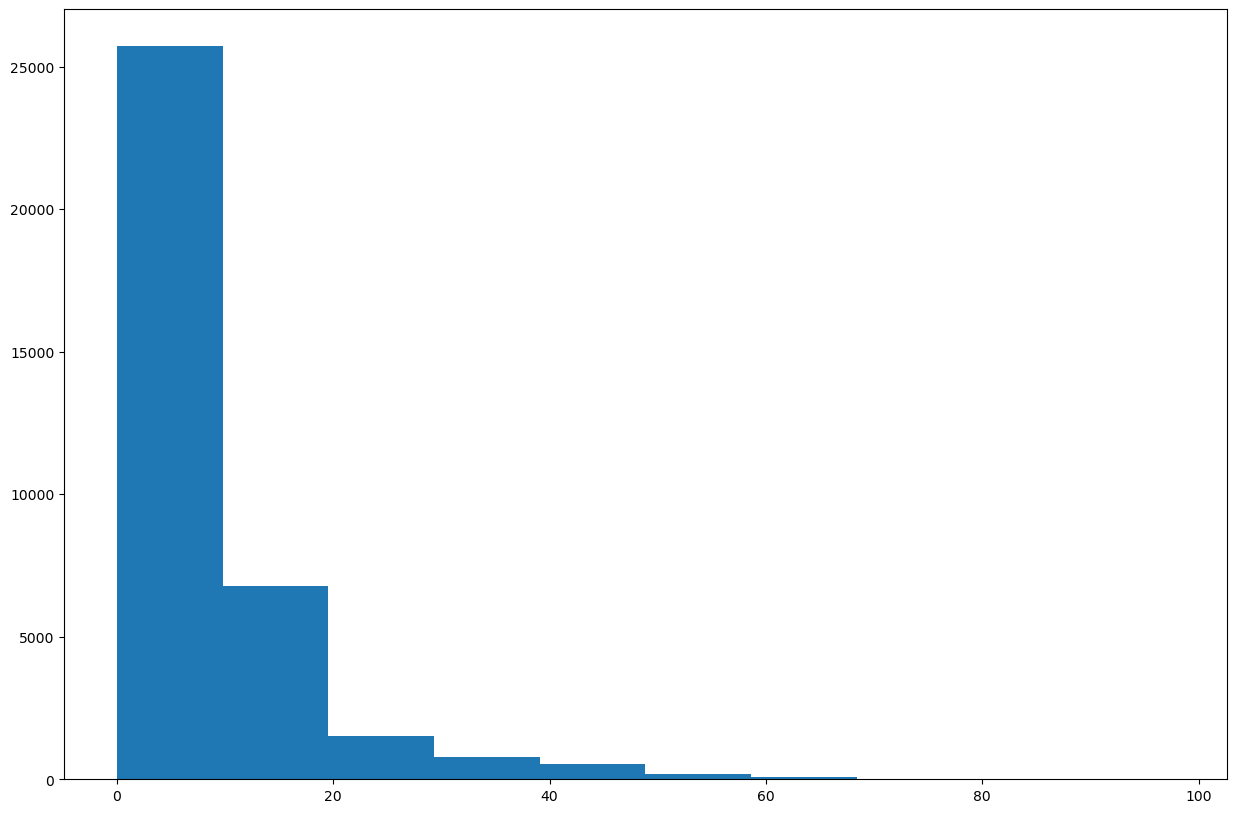

In [58]:
def plot_maximum_pct_removed():

    pct_genome_removed= list()
    pct_congruence = list()
    for gid, d_data in tqdm(D_DATA_LT50.items()):
        pct_genome_removed.append(max(d_data['x']))
        pct_congruence.append(max(d_data['y']))

    fig, ax = plt.subplots(figsize=(15,10))
    ax.hist(pct_genome_removed)
    plt.show()

    return

plot_maximum_pct_removed()

In [71]:
PCT_REMOVED = (1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100)
CONGRUENCE = (30, 40, 50, 60, 70, 80, 90)

# Vary proprortion removed, and the permissible contamination
def gen_data_123():

    results = defaultdict(list)

    for congruence in CONGRUENCE:
        print(f'Congruence: {congruence}')
        df_below_congruence = DF_RANKING[DF_RANKING['pct_correct'] < congruence]

        for pct_removed in PCT_REMOVED:
            print(f'Percent Removed: {pct_removed}')

            d_gid_to_total_len_removed = defaultdict(lambda: 0)
            skip_gids = set()

            for row in tqdm(df_below_congruence.itertuples(), total=len(df_below_congruence)):
                gid = row.gid

                if gid in skip_gids:
                    continue

                # Calculate the new pct removed for this genome
                new_pct_removed = (d_gid_to_total_len_removed[gid] + int(row.length)) / D_GID_TO_TOTAL_SIZE[gid] * 100

                # If it's above this bracket, then ignore
                if new_pct_removed > pct_removed:
                    skip_gids.add(gid)
                    continue

                # Otherwise, keep removing contigs
                d_gid_to_total_len_removed[gid] += int(row.length)

            # Save the resuls
            for gid, total_length in D_GID_TO_TOTAL_SIZE.items():
                final_pct_removed = d_gid_to_total_len_removed[gid] / total_length * 100
                results[(congruence, pct_removed)].append(final_pct_removed)

    return results

DATA_123 = gen_data_123()

Congruence: 30
Percent Removed: 1


100%|██████████| 2129936/2129936 [00:03<00:00, 586111.63it/s]


Percent Removed: 5


100%|██████████| 2129936/2129936 [00:04<00:00, 519015.03it/s]


Percent Removed: 10


100%|██████████| 2129936/2129936 [00:04<00:00, 516487.23it/s]


Percent Removed: 15


100%|██████████| 2129936/2129936 [00:04<00:00, 506186.02it/s]


Percent Removed: 20


100%|██████████| 2129936/2129936 [00:04<00:00, 503380.31it/s]


Percent Removed: 30


100%|██████████| 2129936/2129936 [00:04<00:00, 498875.17it/s]


Percent Removed: 40


100%|██████████| 2129936/2129936 [00:04<00:00, 502719.96it/s]


Percent Removed: 50


100%|██████████| 2129936/2129936 [00:04<00:00, 501690.60it/s]


Percent Removed: 60


100%|██████████| 2129936/2129936 [00:04<00:00, 495264.24it/s]


Percent Removed: 70


100%|██████████| 2129936/2129936 [00:04<00:00, 501857.99it/s]


Percent Removed: 80


100%|██████████| 2129936/2129936 [00:04<00:00, 504472.64it/s]


Percent Removed: 90


100%|██████████| 2129936/2129936 [00:04<00:00, 491655.68it/s]


Percent Removed: 100


100%|██████████| 2129936/2129936 [00:04<00:00, 509915.90it/s]


Congruence: 40
Percent Removed: 1


100%|██████████| 2219070/2219070 [00:03<00:00, 600977.44it/s]


Percent Removed: 5


100%|██████████| 2219070/2219070 [00:04<00:00, 527474.02it/s]


Percent Removed: 10


100%|██████████| 2219070/2219070 [00:04<00:00, 510772.74it/s]


Percent Removed: 15


100%|██████████| 2219070/2219070 [00:04<00:00, 507209.50it/s]


Percent Removed: 20


100%|██████████| 2219070/2219070 [00:04<00:00, 515988.18it/s]


Percent Removed: 30


100%|██████████| 2219070/2219070 [00:04<00:00, 515540.07it/s]


Percent Removed: 40


100%|██████████| 2219070/2219070 [00:04<00:00, 503677.92it/s]


Percent Removed: 50


100%|██████████| 2219070/2219070 [00:04<00:00, 511185.46it/s]


Percent Removed: 60


100%|██████████| 2219070/2219070 [00:04<00:00, 508501.71it/s]


Percent Removed: 70


100%|██████████| 2219070/2219070 [00:04<00:00, 507879.81it/s]


Percent Removed: 80


100%|██████████| 2219070/2219070 [00:04<00:00, 513309.90it/s]


Percent Removed: 90


100%|██████████| 2219070/2219070 [00:04<00:00, 510766.49it/s]


Percent Removed: 100


100%|██████████| 2219070/2219070 [00:04<00:00, 505624.46it/s]


Congruence: 50
Percent Removed: 1


100%|██████████| 2273096/2273096 [00:03<00:00, 604600.18it/s]


Percent Removed: 5


100%|██████████| 2273096/2273096 [00:04<00:00, 542604.61it/s]


Percent Removed: 10


100%|██████████| 2273096/2273096 [00:04<00:00, 522795.46it/s]


Percent Removed: 15


100%|██████████| 2273096/2273096 [00:04<00:00, 520119.64it/s]


Percent Removed: 20


100%|██████████| 2273096/2273096 [00:04<00:00, 515316.25it/s]


Percent Removed: 30


100%|██████████| 2273096/2273096 [00:04<00:00, 510577.81it/s]


Percent Removed: 40


100%|██████████| 2273096/2273096 [00:04<00:00, 507252.20it/s]


Percent Removed: 50


100%|██████████| 2273096/2273096 [00:04<00:00, 503805.21it/s]


Percent Removed: 60


100%|██████████| 2273096/2273096 [00:04<00:00, 504395.69it/s]


Percent Removed: 70


100%|██████████| 2273096/2273096 [00:04<00:00, 508880.55it/s]


Percent Removed: 80


100%|██████████| 2273096/2273096 [00:04<00:00, 510616.12it/s]


Percent Removed: 90


100%|██████████| 2273096/2273096 [00:04<00:00, 513850.33it/s]


Percent Removed: 100


100%|██████████| 2273096/2273096 [00:04<00:00, 507614.34it/s]


Congruence: 60
Percent Removed: 1


100%|██████████| 2478114/2478114 [00:04<00:00, 616535.67it/s]


Percent Removed: 5


100%|██████████| 2478114/2478114 [00:04<00:00, 548052.20it/s]


Percent Removed: 10


100%|██████████| 2478114/2478114 [00:04<00:00, 522744.76it/s]


Percent Removed: 15


100%|██████████| 2478114/2478114 [00:04<00:00, 520848.75it/s]


Percent Removed: 20


100%|██████████| 2478114/2478114 [00:04<00:00, 517119.56it/s]


Percent Removed: 30


100%|██████████| 2478114/2478114 [00:04<00:00, 504003.06it/s]


Percent Removed: 40


100%|██████████| 2478114/2478114 [00:04<00:00, 509516.80it/s]


Percent Removed: 50


100%|██████████| 2478114/2478114 [00:04<00:00, 505256.65it/s]


Percent Removed: 60


100%|██████████| 2478114/2478114 [00:04<00:00, 502447.83it/s]


Percent Removed: 70


100%|██████████| 2478114/2478114 [00:04<00:00, 505020.02it/s]


Percent Removed: 80


100%|██████████| 2478114/2478114 [00:04<00:00, 507323.29it/s]


Percent Removed: 90


100%|██████████| 2478114/2478114 [00:04<00:00, 507582.78it/s]


Percent Removed: 100


100%|██████████| 2478114/2478114 [00:04<00:00, 508284.77it/s]


Congruence: 70
Percent Removed: 1


100%|██████████| 2664547/2664547 [00:04<00:00, 623286.88it/s]


Percent Removed: 5


100%|██████████| 2664547/2664547 [00:04<00:00, 559647.79it/s]


Percent Removed: 10


100%|██████████| 2664547/2664547 [00:04<00:00, 534632.75it/s]


Percent Removed: 15


100%|██████████| 2664547/2664547 [00:05<00:00, 525934.14it/s]


Percent Removed: 20


100%|██████████| 2664547/2664547 [00:05<00:00, 515229.82it/s]


Percent Removed: 30


100%|██████████| 2664547/2664547 [00:05<00:00, 504634.24it/s]


Percent Removed: 40


100%|██████████| 2664547/2664547 [00:05<00:00, 510527.75it/s]


Percent Removed: 50


100%|██████████| 2664547/2664547 [00:05<00:00, 498519.27it/s]


Percent Removed: 60


100%|██████████| 2664547/2664547 [00:05<00:00, 495823.30it/s]


Percent Removed: 70


100%|██████████| 2664547/2664547 [00:05<00:00, 505644.14it/s]


Percent Removed: 80


100%|██████████| 2664547/2664547 [00:05<00:00, 491500.47it/s]


Percent Removed: 90


100%|██████████| 2664547/2664547 [00:05<00:00, 508136.04it/s]


Percent Removed: 100


100%|██████████| 2664547/2664547 [00:05<00:00, 502771.50it/s]


Congruence: 80
Percent Removed: 1


100%|██████████| 2848614/2848614 [00:04<00:00, 626068.59it/s]


Percent Removed: 5


100%|██████████| 2848614/2848614 [00:05<00:00, 567388.24it/s]


Percent Removed: 10


100%|██████████| 2848614/2848614 [00:05<00:00, 536220.19it/s]


Percent Removed: 15


100%|██████████| 2848614/2848614 [00:05<00:00, 530730.85it/s]


Percent Removed: 20


100%|██████████| 2848614/2848614 [00:05<00:00, 512752.21it/s]


Percent Removed: 30


100%|██████████| 2848614/2848614 [00:05<00:00, 502460.61it/s]


Percent Removed: 40


100%|██████████| 2848614/2848614 [00:05<00:00, 506375.32it/s]


Percent Removed: 50


100%|██████████| 2848614/2848614 [00:05<00:00, 510727.46it/s]


Percent Removed: 60


100%|██████████| 2848614/2848614 [00:05<00:00, 502351.62it/s]


Percent Removed: 70


100%|██████████| 2848614/2848614 [00:05<00:00, 497848.43it/s]


Percent Removed: 80


100%|██████████| 2848614/2848614 [00:05<00:00, 500659.50it/s]


Percent Removed: 90


100%|██████████| 2848614/2848614 [00:05<00:00, 501378.70it/s]


Percent Removed: 100


100%|██████████| 2848614/2848614 [00:05<00:00, 499188.38it/s]


Congruence: 90
Percent Removed: 1


100%|██████████| 3192683/3192683 [00:05<00:00, 632726.92it/s]


Percent Removed: 5


100%|██████████| 3192683/3192683 [00:05<00:00, 572831.84it/s]


Percent Removed: 10


100%|██████████| 3192683/3192683 [00:05<00:00, 555030.49it/s]


Percent Removed: 15


100%|██████████| 3192683/3192683 [00:05<00:00, 541903.96it/s]


Percent Removed: 20


100%|██████████| 3192683/3192683 [00:06<00:00, 520512.32it/s]


Percent Removed: 30


100%|██████████| 3192683/3192683 [00:06<00:00, 520204.10it/s]


Percent Removed: 40


100%|██████████| 3192683/3192683 [00:06<00:00, 514825.73it/s]


Percent Removed: 50


100%|██████████| 3192683/3192683 [00:06<00:00, 501542.26it/s]


Percent Removed: 60


100%|██████████| 3192683/3192683 [00:06<00:00, 498987.80it/s]


Percent Removed: 70


100%|██████████| 3192683/3192683 [00:06<00:00, 509020.69it/s]


Percent Removed: 80


100%|██████████| 3192683/3192683 [00:06<00:00, 492417.28it/s]


Percent Removed: 90


100%|██████████| 3192683/3192683 [00:06<00:00, 500779.38it/s]


Percent Removed: 100


100%|██████████| 3192683/3192683 [00:06<00:00, 496223.71it/s]


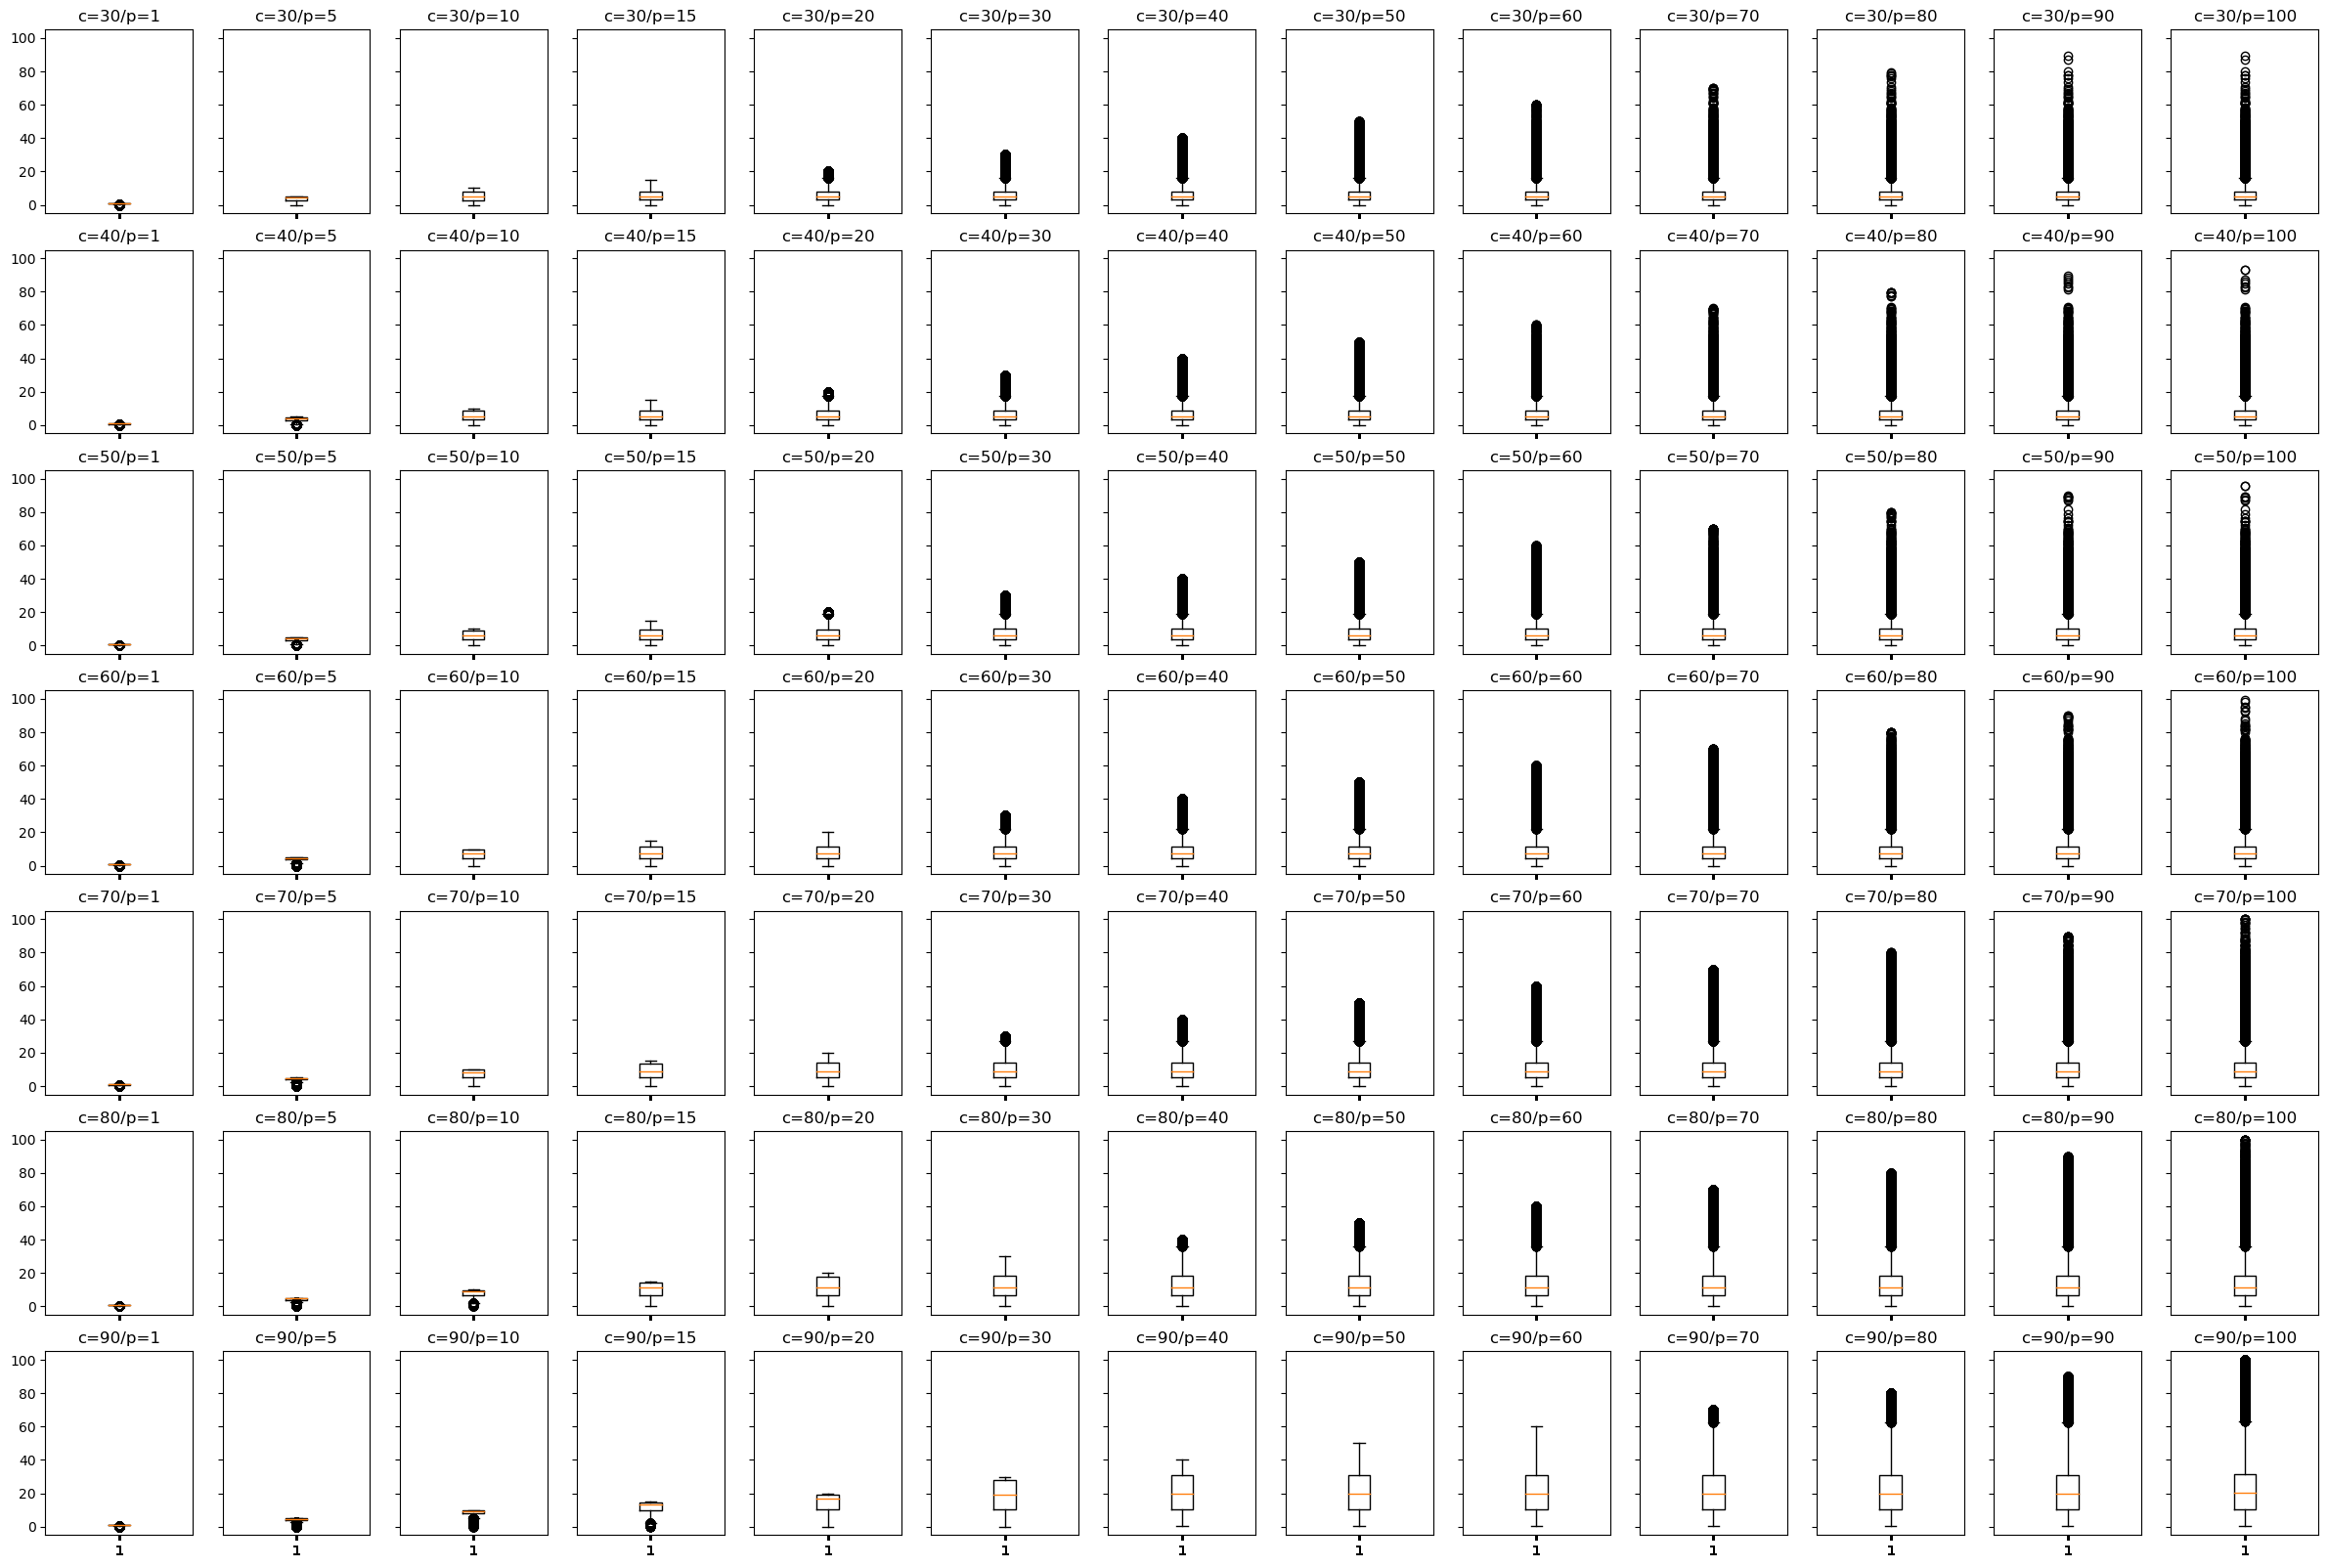

In [74]:
def plot_data_123():

    fig, axes = plt.subplots(len(CONGRUENCE), len(PCT_REMOVED), sharex=True,sharey=True, figsize=(30,20))

    for i, congruence in enumerate(CONGRUENCE):
        for j, pct_removed in enumerate(PCT_REMOVED):
            ax = axes[i, j]
            ax.boxplot(DATA_123[(congruence, pct_removed)])
            ax.set_title(f'c={congruence}/p={pct_removed}')

    plt.show()

    return

plot_data_123()